## **Importing Data and Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
%matplotlib inline
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso
from sklearn import metrics


In [ ]:
from google.colab import files
files.upload()

In [116]:
df=pd.read_csv('task7.csv')
df.head()

,company,model_name,rating,processor_name,processor_type,generation,ram,os,storage,size,warranty(year),price
0,Lenovo,IdeaPad,4.4,Intel,Corei3,11thGen,8GB,Windows 10 Operating System,512 GB SSD,15.6 inch,2.0,"₹63,790"
1,ASUS,TUF,4.4,Intel,Corei5,10thGen,8GB,Windows 10 Operating System,512 GB SSD,15.6 Inch,1.0,"₹89,990"
2,MSI,GF65,4.4,Intel,Corei7,10thGen,16GB,Windows 10 Operating System,1 TB SSD,15.6 inch,2.0,"₹1,23,990"
3,DELL,Vostro,3.9,Intel,Corei3,11thGen,8GB,Windows 10 Operating System,1 TB HDD,14 inch,1.0,"₹41,715"
4,ASUS,Core,4.3,Intel,Corei3,10thGen,4GB,Windows 10 Operating System,512 GB SSD,15.6 inch,1.0,"₹48,990"


## **Data Cleaning**

In [ ]:
#Checking null values
df.isnull().sum()

company             0
model_name          0
rating            180
processor_name      0
processor_type      0
generation        135
ram                 0
os                  0
storage             0
size                0
warranty(year)    171
price               0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   company         572 non-null    object 
 1   model_name      572 non-null    object 
 2   rating          392 non-null    float64
 3   processor_name  572 non-null    object 
 4   processor_type  572 non-null    object 
 5   generation      437 non-null    object 
 6   ram             572 non-null    object 
 7   os              572 non-null    object 
 8   storage         572 non-null    object 
 9   size            572 non-null    object 
 10  warranty(year)  401 non-null    float64
 11  price           572 non-null    object 
dtypes: float64(2), object(10)
memory usage: 53.8+ KB


In [ ]:
df.shape

(572, 11)

In [ ]:
#Dropping warranty column
df.drop(['warranty(year)'],axis=1, inplace=True)

In [ ]:
#Checking duplicates
df[df.duplicated()]

,company,model_name,rating,processor_name,processor_type,generation,ram,os,storage,size,price
41,ASUS,VivoBook,4.5,Intel,Corei5,11thGen,8GB,Windows 10 Operating System,512 GB SSD,14 inch,"₹73,990"
61,APPLE,MacBook,4.7,Apple,M1Processor,NaN,8GB,Mac OS Operating System,256 GB SSD,13.3 inch,"₹1,22,900"
70,HP,Core,4.3,Intel,Corei3,11thGen,8GB,Windows 10 Operating System,512 GB SSD,15.6 inch,"₹52,324"
110,Infinix,X1,4.2,Intel,Corei3,10thGen,8GB,Windows 11 Operating System,256 GB SSD,14 inch,"₹49,999"
119,MSI,Core,NaN,Intel,Corei3,10thGen,8GB,Windows 10 Operating System,512 GB SSD,14 inch,"₹55,990"
125,APPLE,MacBook,4.7,Apple,M1Processor,NaN,8GB,Mac OS Operating System,512 GB SSD,13.3 inch,"₹1,17,900"
136,ASUS,Vivobook,NaN,Intel,Corei3,11thGen,8GB,Windows 11 Operating System,1 TB HDD|256 GB SSD,14.1 inch,"₹57,990"
218,ASUS,VivoBook,4.4,Intel,Corei3,10thGen,4GB,Windows 10 Operating System,512 GB SSD,14 inch,"₹49,990"
220,DELL,XPS,NaN,Intel,Corei5,11thGen,16GB,Windows 10 Operating System,512 GB SSD,13.3 Inch,"₹1,15,729"
223,DELL,Vostro,4.1,Intel,Corei5,11thGen,8GB,Windows 10 Operating System,512 GB SSD,14 inch,"₹87,168"


In [ ]:
#removing duplicate values
df.drop_duplicates(keep=False, inplace=True)

filling null values with most occuring values

In [ ]:
df['rating']=df['rating'].fillna(df['rating'].mode()[0])

In [ ]:
df['generation']=df['generation'].fillna(df['generation'].mode()[0])

In [ ]:
df.shape

(497, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497 entries, 0 to 571
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   company         497 non-null    object 
 1   model_name      497 non-null    object 
 2   rating          497 non-null    float64
 3   processor_name  497 non-null    object 
 4   processor_type  497 non-null    object 
 5   generation      497 non-null    object 
 6   ram             497 non-null    object 
 7   os              497 non-null    object 
 8   storage         497 non-null    object 
 9   size            497 non-null    object 
 10  price           497 non-null    object 
dtypes: float64(1), object(10)
memory usage: 46.6+ KB


In [ ]:
df['generation'].unique()

array(['11thGen', '10thGen', '10th', '9thGen', '8thGen', '4thGen', '4th',
       '7thGen'], dtype=object)

In [ ]:
df.isnull().sum()

company           0
model_name        0
rating            0
processor_name    0
processor_type    0
generation        0
ram               0
os                0
storage           0
size              0
price             0
dtype: int64

In [ ]:
#removing GB from each row and add it in the column name instead
df['ram'] = df['ram'].str.replace('GB', '')

In [ ]:
#Rename the column ram(GB) to ram
df.rename(columns={'ram': 'ram(GB)'}, inplace=True)

In [ ]:
#Change the data type to integer
df['ram(GB)'] = df['ram(GB)'].astype(int)

In [ ]:
#Removing thGen in generation
df['generation'] = df['generation'].str.replace('thGen', '')

In [ ]:
#Removing th in generation
df['generation']=df['generation'].str.replace('th','')

In [ ]:
df['generation'].unique()

array(['11', '10', '9', '8', '4', '7'], dtype=object)

In [ ]:
#Change the data type into integer
df['generation'] = df['generation'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497 entries, 0 to 571
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   company         497 non-null    object 
 1   model_name      497 non-null    object 
 2   rating          497 non-null    float64
 3   processor_name  497 non-null    object 
 4   processor_type  497 non-null    object 
 5   generation      497 non-null    int64  
 6   ram(GB)         497 non-null    int64  
 7   os              497 non-null    object 
 8   storage         497 non-null    object 
 9   size            497 non-null    object 
 10  price           497 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 46.6+ KB


In [ ]:
df.head()

,company,model_name,rating,processor_name,processor_type,generation,ram(GB),os,storage,size,price
0,Lenovo,IdeaPad,4.4,Intel,Corei3,11,8,Windows 10 Operating System,512 GB SSD,15.6 inch,"₹63,790"
1,ASUS,TUF,4.4,Intel,Corei5,10,8,Windows 10 Operating System,512 GB SSD,15.6 Inch,"₹89,990"
2,MSI,GF65,4.4,Intel,Corei7,10,16,Windows 10 Operating System,1 TB SSD,15.6 inch,"₹1,23,990"
3,DELL,Vostro,3.9,Intel,Corei3,11,8,Windows 10 Operating System,1 TB HDD,14 inch,"₹41,715"
4,ASUS,Core,4.3,Intel,Corei3,10,4,Windows 10 Operating System,512 GB SSD,15.6 inch,"₹48,990"


In [ ]:
df['size'].unique()

array(['15.6 inch', '15.6 Inch', '14 inch', '14 Inch', '14 inches',
       '13.3 inch', '17.3 inch', '15 inch', '16 Inch', '13.3 inches',
       '14.1 inch', '15.6 inches', '13 inch', '13.4 inch', '13.3 Inch',
       '16 inch', '14.2 inch', '13.5 inch', '12 inch', '13.4 Inch',
       '11.6 inch', '17.3 Inch', '14.5 inch', '16.1 inch', '16 inches',
       '14 Inches', '12.2 inch'], dtype=object)

In [ ]:
#We will remove inch from each row and add it in the column name instead
df['size']=df['size'].str.replace('inch','')

In [ ]:
df['size']=df['size'].str.replace('Inch','')
df['size']=df['size'].str.replace('Inches','')
df['size']=df['size'].str.replace('es','')

In [ ]:
df.rename(columns={'size': 'size(inch)'}, inplace=True)

In [ ]:
df['size(inch)'] = df['size(inch)'].astype(float)

In [ ]:
df.head()

,company,model_name,rating,processor_name,processor_type,generation,ram(GB),os,storage,size(inch),price
0,Lenovo,IdeaPad,4.4,Intel,Corei3,11,8,Windows 10 Operating System,512 GB SSD,15.6,"₹63,790"
1,ASUS,TUF,4.4,Intel,Corei5,10,8,Windows 10 Operating System,512 GB SSD,15.6,"₹89,990"
2,MSI,GF65,4.4,Intel,Corei7,10,16,Windows 10 Operating System,1 TB SSD,15.6,"₹1,23,990"
3,DELL,Vostro,3.9,Intel,Corei3,11,8,Windows 10 Operating System,1 TB HDD,14.0,"₹41,715"
4,ASUS,Core,4.3,Intel,Corei3,10,4,Windows 10 Operating System,512 GB SSD,15.6,"₹48,990"


In [ ]:
df['size(inch)'].unique()

array([15.6, 14. , 13.3, 17.3, 15. , 16. , 14.1, 13. , 13.4, 14.2, 13.5,
       12. , 11.6, 14.5, 16.1, 12.2])

In [ ]:
df.corr()

,rating,generation,ram(GB),size(inch)
rating,1.000000,0.181012,0.215530,-0.033881
generation,0.181012,1.000000,0.198294,0.166068
ram(GB),0.215530,0.198294,1.000000,-0.005337
size(inch),-0.033881,0.166068,-0.005337,1.000000


In [ ]:
df['OS'] = df['os'].copy() # Creating a copy of Operating System
df['OS'].unique()

array(['  Windows 10 Operating System', '  Windows 11 Operating System',
       'Windows 10 Operating System', 'Mac OS Operating System',
       '  DOS Operating System', 'Windows 11 Operating System',
       '  Windows 8 Operating System', 'DOS Operating System'],
      dtype=object)

In [ ]:
OS = []
for i in df['OS']:
  if('Windows' in i): # Windows Operating System
    OS.append('Windows')
  elif('Mac' in i):   # Mac Operating System
    OS.append('Mac')
  elif('DOS' in i):   # DOS Operating System
    OS.append('DOS')
df['OS'] = OS
print(len(df['OS']))
df['OS']

572


0      Windows
1      Windows
2      Windows
3      Windows
4      Windows
        ...   
567        DOS
568    Windows
569    Windows
570        DOS
571    Windows
Name: OS, Length: 572, dtype: object

In [ ]:
df.drop('os',axis = 1, inplace = True)

In [ ]:
df.head()

,company,model_name,rating,processor_name,processor_type,generation,ram(GB),storage,size(inch),price,OS
0,Lenovo,IdeaPad,4.4,Intel,Corei3,11,8,512 GB SSD,15.6,"₹63,790",Windows
1,ASUS,TUF,4.4,Intel,Corei5,10,8,512 GB SSD,15.6,"₹89,990",Windows
2,MSI,GF65,4.4,Intel,Corei7,10,16,1 TB SSD,15.6,"₹1,23,990",Windows
3,DELL,Vostro,3.9,Intel,Corei3,11,8,1 TB HDD,14.0,"₹41,715",Windows
4,ASUS,Core,4.3,Intel,Corei3,10,4,512 GB SSD,15.6,"₹48,990",Windows


In [ ]:
df['storage']

0      512 GB SSD
1      512 GB SSD
2        1 TB SSD
3        1 TB HDD
4      512 GB SSD
          ...    
567    256 GB SSD
568      1 TB HDD
569      1 TB HDD
570      1 TB HDD
571    512 GB SSD
Name: storage, Length: 572, dtype: object

In [ ]:
df['storage'].value_counts()

512 GB SSD               263
1 TB HDD                  83
256 GB SSD                74
1 TB SSD                  73
1 TB HDD|256 GB SSD       56
128 GB SSD                 7
1 TB HDD|128 GB SSD        5
512 GB HDD|512 GB SSD      3
2 TB SSD                   3
1 TB HDD|512 GB SSD        1
3 TB SSD                   1
8 GB SSD                   1
2 TB HDD                   1
256 GB HDD|256 GB SSD      1
Name: storage, dtype: int64

In [ ]:
df['storage_1']=df['storage']

In [ ]:
#converting all the element into GB
df['storage_1']=df['storage_1'].str.replace('1.0TB','1TB', regex=True)
df['storage_1']=df['storage_1'].str.replace('1TB','1000GB')
df['storage_1']=df['storage_1'].str.replace('2TB','2000GB')
df['storage_1']=df['storage_1'].str.replace('GB','')
df['storage_1'].value_counts()

512  SSD             263
1 TB HDD              83
256  SSD              74
1 TB SSD              73
1 TB HDD|256  SSD     56
128  SSD               7
1 TB HDD|128  SSD      5
512  HDD|512  SSD      3
2 TB SSD               3
1 TB HDD|512  SSD      1
3 TB SSD               1
8  SSD                 1
2 TB HDD               1
256  HDD|256  SSD      1
Name: storage_1, dtype: int64

In [ ]:
df['storage2']=df['storage_1'].str.replace(r' ','')
df['storage2'].value_counts()

512SSD           263
1TBHDD            83
256SSD            74
1TBSSD            73
1TBHDD|256SSD     56
128SSD             7
1TBHDD|128SSD      5
512HDD|512SSD      3
2TBSSD             3
1TBHDD|512SSD      1
3TBSSD             1
8SSD               1
2TBHDD             1
256HDD|256SSD      1
Name: storage2, dtype: int64

 We can see that some laptops have 2 hard drives, there are 4 differnt types of disks: 'SSD', ''HDD', 'Hybrid' and 'Flash Storage'. We will create new columns to include all these information.

In [ ]:
#separated the drives into two lists
storage_1=[]
storage_2=[]
for i in df['storage2']:
    if len(re.findall(r'\+',i))==1: # DOUBLE DRIVE
        one=re.findall(r'(\w+)',i)
        storage_1.append(one[0])
        storage_2.append(one[1])
    else: # SINGLE DRIVE
        one=re.findall(r'(\w+)',i)
        storage_1.append(one[0])
        storage_2.append('NaN')

In [ ]:
df.head()

,company,model_name,rating,processor_name,processor_type,generation,ram(GB),storage,size(inch),price,OS,storage_1,storage2
0,Lenovo,IdeaPad,4.4,Intel,Corei3,11,8,512 GB SSD,15.6,"₹63,790",Windows,512 SSD,512SSD
1,ASUS,TUF,4.4,Intel,Corei5,10,8,512 GB SSD,15.6,"₹89,990",Windows,512 SSD,512SSD
2,MSI,GF65,4.4,Intel,Corei7,10,16,1 TB SSD,15.6,"₹1,23,990",Windows,1 TB SSD,1TBSSD
3,DELL,Vostro,3.9,Intel,Corei3,11,8,1 TB HDD,14.0,"₹41,715",Windows,1 TB HDD,1TBHDD
4,ASUS,Core,4.3,Intel,Corei3,10,4,512 GB SSD,15.6,"₹48,990",Windows,512 SSD,512SSD


In [ ]:
#create two more lists that will contain the memory types
storage_1_gb=[]
storage_1_type=[]
for i in storage_1:
    storage_1_type.append(re.findall(r'(\D\w+)',i)[0])
    storage_1_gb.append(re.findall(r'(\d+)',i)[0])

In [ ]:
#created the same two lists that will contain type and capacity also for the second drive
storage_2_gb=[]
storage_2_type=[]
for i in storage_2:
    if i != 'NaN':
        storage_2_type.append(re.findall(r'(\D\w+)',i)[0])
        storage_2_gb.append(re.findall(r'(\d+)',i)[0])
    else:
        storage_2_type.append('NaN')
        storage_2_gb.append(0)

In [ ]:
df['storage_1_sto(GB)'] = storage_1_gb
df['storage_1_type'] = storage_1_type
df['storage_2_sto(GB)'] = storage_2_gb
df['storage_2_type'] = storage_2_type

In [ ]:
#convert the capacity related columns to floats
df['storage_1_sto(GB)'] = df['storage_1_sto(GB)'].astype(float)
df['storage_2_sto(GB)'] = df['storage_2_sto(GB)'].astype(float)

In [ ]:
df.head()

,company,model_name,rating,processor_name,processor_type,generation,ram(GB),storage,size(inch),price,OS,storage_1,storage2,storage_1_sto(GB),storage_1_type,storage_2_sto(GB),storage_2_type
0,Lenovo,IdeaPad,4.4,Intel,Corei3,11,8,512 GB SSD,15.6,"₹63,790",Windows,512 SSD,512SSD,512.0,SSD,0.0,NaN
1,ASUS,TUF,4.4,Intel,Corei5,10,8,512 GB SSD,15.6,"₹89,990",Windows,512 SSD,512SSD,512.0,SSD,0.0,NaN
2,MSI,GF65,4.4,Intel,Corei7,10,16,1 TB SSD,15.6,"₹1,23,990",Windows,1 TB SSD,1TBSSD,1.0,TBSSD,0.0,NaN
3,DELL,Vostro,3.9,Intel,Corei3,11,8,1 TB HDD,14.0,"₹41,715",Windows,1 TB HDD,1TBHDD,1.0,TBHDD,0.0,NaN
4,ASUS,Core,4.3,Intel,Corei3,10,4,512 GB SSD,15.6,"₹48,990",Windows,512 SSD,512SSD,512.0,SSD,0.0,NaN


In [ ]:
df=df.drop(['storage_1','storage2','storage','storage_2_sto(GB)','storage_2_type'], axis=1)

In [ ]:
df.head()

,company,model_name,rating,processor_name,processor_type,generation,ram(GB),size(inch),price,OS,storage_1_sto(GB),storage_1_type
0,Lenovo,IdeaPad,4.4,Intel,Corei3,11,8,15.6,"₹63,790",Windows,512.0,SSD
1,ASUS,TUF,4.4,Intel,Corei5,10,8,15.6,"₹89,990",Windows,512.0,SSD
2,MSI,GF65,4.4,Intel,Corei7,10,16,15.6,"₹1,23,990",Windows,1.0,TBSSD
3,DELL,Vostro,3.9,Intel,Corei3,11,8,14.0,"₹41,715",Windows,1.0,TBHDD
4,ASUS,Core,4.3,Intel,Corei3,10,4,15.6,"₹48,990",Windows,512.0,SSD


In [ ]:
#removing rupee symbol from price
df['price'] = df['price'].str.replace('₹', '')
df['price'] = df['price'].str.replace(',', '')

In [ ]:
df['price'] = df['price'].astype(float)

In [ ]:
df.head()

,company,model_name,rating,processor_name,processor_type,generation,ram(GB),size(inch),price,OS,storage_1_sto(GB),storage_1_type
0,Lenovo,IdeaPad,4.4,Intel,Corei3,11,8,15.6,63790.0,Windows,512.0,SSD
1,ASUS,TUF,4.4,Intel,Corei5,10,8,15.6,89990.0,Windows,512.0,SSD
2,MSI,GF65,4.4,Intel,Corei7,10,16,15.6,123990.0,Windows,1.0,TBSSD
3,DELL,Vostro,3.9,Intel,Corei3,11,8,14.0,41715.0,Windows,1.0,TBHDD
4,ASUS,Core,4.3,Intel,Corei3,10,4,15.6,48990.0,Windows,512.0,SSD


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company            572 non-null    object 
 1   model_name         572 non-null    object 
 2   rating             572 non-null    float64
 3   processor_name     572 non-null    object 
 4   processor_type     572 non-null    object 
 5   generation         572 non-null    int64  
 6   ram(GB)            572 non-null    int64  
 7   size(inch)         572 non-null    float64
 8   price              572 non-null    float64
 9   OS                 572 non-null    object 
 10  storage_1_sto(GB)  572 non-null    float64
 11  storage_1_type     572 non-null    object 
dtypes: float64(4), int64(2), object(6)
memory usage: 53.8+ KB


In [ ]:
df.describe()

,rating,generation,ram(GB),size(inch),price,storage_1_sto(GB)
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000
mean,4.247028,10.379371,10.111888,14.769231,94017.562937,273.645105
std,0.366612,1.102994,5.106371,0.978829,52675.971444,236.466246
min,1.700000,4.000000,4.000000,11.600000,21896.000000,1.000000
25%,4.200000,10.000000,8.000000,14.000000,58476.500000,1.000000
50%,4.300000,11.000000,8.000000,15.600000,80850.500000,256.000000
75%,4.400000,11.000000,16.000000,15.600000,112242.500000,512.000000
max,5.000000,11.000000,32.000000,17.300000,441990.000000,512.000000


In [ ]:
df.corr()

,rating,generation,ram(GB),size(inch),price,storage_1_sto(GB)
rating,1.000000,0.181012,0.215530,-0.033881,0.212628,0.169764
generation,0.181012,1.000000,0.198294,0.166068,0.115077,0.104607
ram(GB),0.215530,0.198294,1.000000,-0.005337,0.769241,-0.023930
size(inch),-0.033881,0.166068,-0.005337,1.000000,-0.007368,-0.313765
price,0.212628,0.115077,0.769241,-0.007368,1.000000,-0.098005
storage_1_sto(GB),0.169764,0.104607,-0.023930,-0.313765,-0.098005,1.000000


In [ ]:
df['processor_name'].unique()

array(['Intel', 'AMD', 'Apple'], dtype=object)

##**Exploratory Data Analysis EDA**

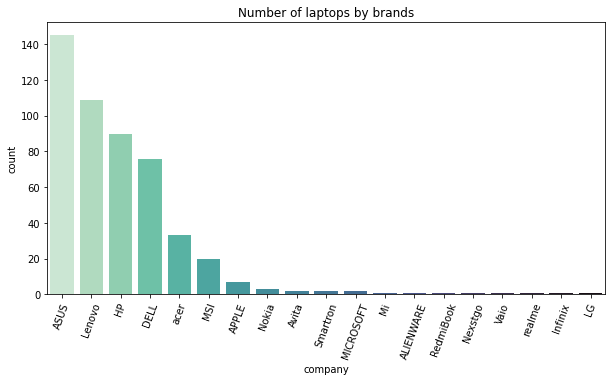

In [ ]:
#most frequent brand
ax  = plt.subplots(figsize=(10,5))
ax=sns.countplot(x='company', data=df, palette='mako_r', order = df['company'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=70)
plt.title('Number of laptops by brands')
plt.show()

Most of laptops are from ASUS,LENOVO,HP

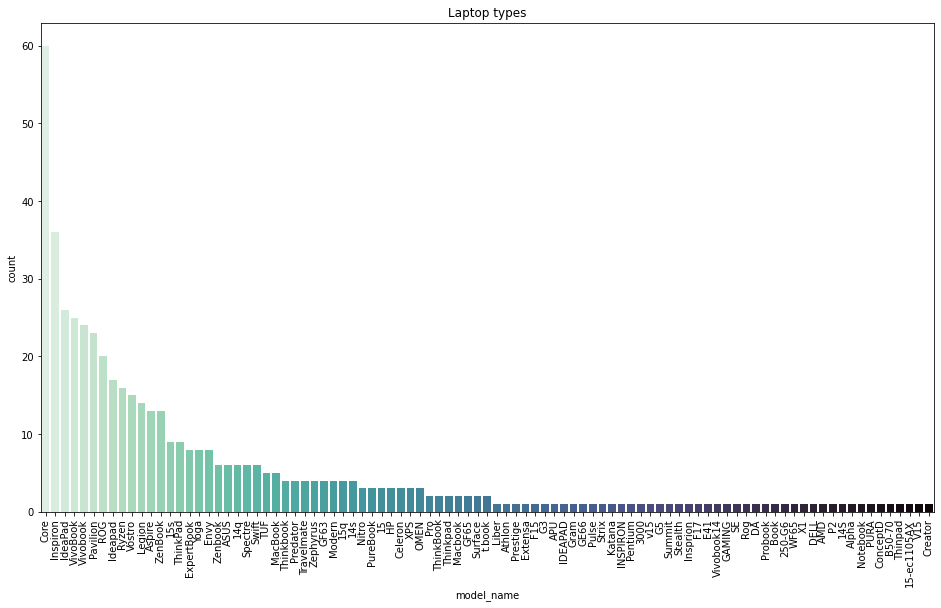

In [ ]:
#Most freqent model
ax  = plt.subplots(figsize=(16,9))
ax=sns.countplot(x='model_name', data=df,palette='mako_r', order = df['model_name'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
plt.title('Laptop types')
plt.show()

Most frequent models are Inspiron,IdeaPad,Vivobook

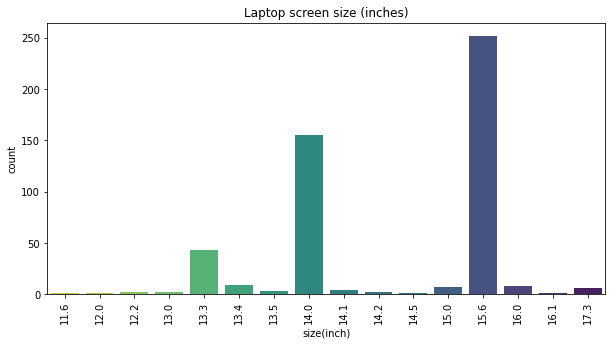

In [ ]:
#Most popular size
ax  = plt.subplots(figsize=(10,5))
ax=sns.countplot(x='size(inch)', data=df, palette='viridis_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation=450);
plt.title('Laptop screen size (inches)')
plt.show()

Most laptops have 15.6 inches

In [ ]:
#Custom functions to improve plot readability:
def num_plot(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,5),gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(title,fontsize=18)
    sns.boxplot(x=col, data=df, ax=ax[0])
    ax[0].set(yticks=[])
    sns.histplot(x=col, data=df, ax=ax[1])
    ax[1].set_xlabel(col, fontsize=16)
    plt.axvline(df[col].mean(), color='darkgreen', linewidth=2.2, label='mean=' + str(np.round(df[col].mean(),1)) + symb)
    plt.axvline(df[col].median(), color='red', linewidth=2.2, label='median='+ str(np.round(df[col].median(),1)) + symb)
    plt.axvline(df[col].mode()[0], color='purple', linewidth=2.2, label='mode='+ str(df[col].mode()[0]) + symb)
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
    plt.tight_layout()
    plt.show()

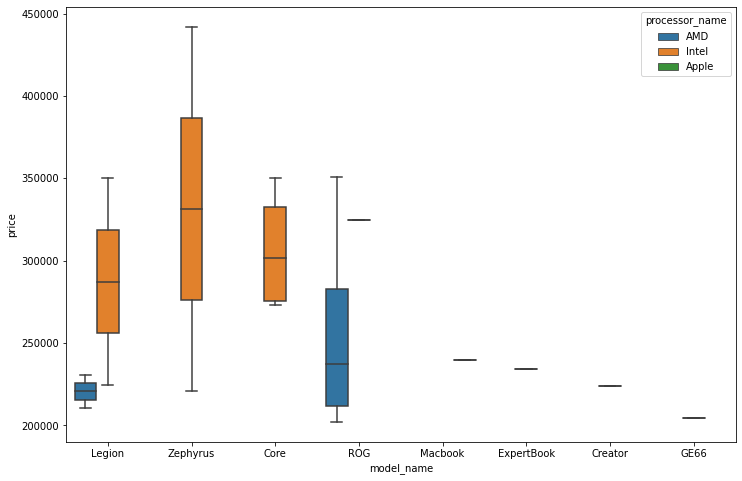

In [ ]:
ax=plt.subplots(figsize=(12,8))
sns.boxplot(x='model_name', y='price', data=df[df['price']>200000], hue='processor_name')

Most of the laptops with price more than 200000 are Zephyrus,Core and Legion with Intel CPU and ROG with AMD CPU

In [ ]:
df[df['price']>300000]

,company,model_name,rating,processor_name,processor_type,generation,ram(GB),size(inch),price,OS,storage_1_sto(GB),storage_1_type
131,ASUS,Zephyrus,4.3,Intel,Corei9,11,32,17.3,441990.0,Windows,3.0,TBSSD
294,Lenovo,Legion,4.3,Intel,Corei7,10,16,15.6,349890.0,Windows,1.0,TBSSD
328,ASUS,ROG,4.3,Intel,Corei7,10,32,15.6,324990.0,Windows,1.0,TBSSD
380,ASUS,Core,5.0,Intel,Corei9,10,32,15.6,326990.0,Windows,1.0,TBSSD
410,ASUS,ROG,4.3,AMD,Ryzen9,11,32,13.4,350990.0,Windows,1.0,TBSSD
556,Lenovo,Core,4.3,Intel,Corei9,10,16,15.6,349890.0,Windows,1.0,TBSSD


The expensive laptop is ASUS Zephyrus with Intel Corei9 11thGeneration

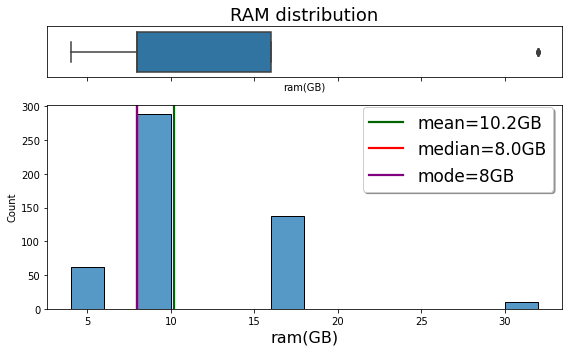

In [ ]:
num_plot(df, 'ram(GB)','RAM distribution','GB')

Most laptops have 8GB ram, which is optimal for Students,Casual users. 8GB is almost sufficient for normal games.However for high end gaming,gamers preffered ram is 16gb or 32gb

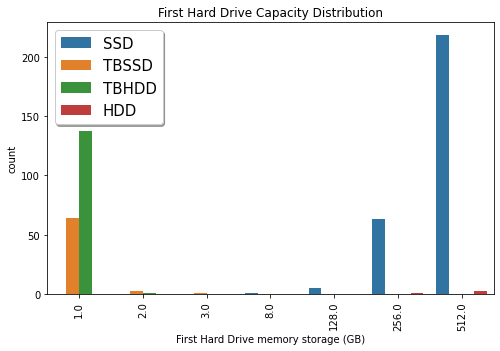

In [ ]:
ax  = plt.subplots(figsize=(8,5))
ax=sns.countplot(x='storage_1_sto(GB)', data=df, hue='storage_1_type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('First Hard Drive memory storage (GB)')
plt.title('First Hard Drive Capacity Distribution')
plt.legend(loc='upper left', ncol=1, fontsize=15, fancybox=True, shadow=True, frameon=True)
plt.show()

Most PCs have 512 ssd which is for the most part ssd, for storage of 1 TB most of them are HDD.

In [ ]:
def lr_plot(df, col_x, col_y, leg):
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[col_x],df[col_y])
    sns.regplot(x=col_x, y = col_y, data=df, color='#0d98ba', line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
    plt.legend(loc=leg, ncol=1, fontsize=15, fancybox=True, shadow=True, frameon=True)
    plt.title(col_y + ' VS ' + col_x)
    plt.show()

    return slope, intercept

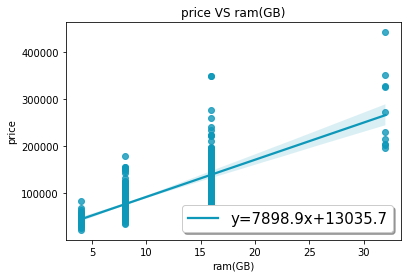

In [ ]:
slope, intercept = lr_plot(df,'ram(GB)','price', 'lower right')

According to the slope, every GB of RAM added on the PC adds roughly 7898₹ to the laptop value.

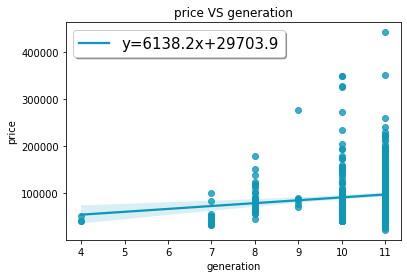

In [ ]:
slope, intercept = lr_plot(df,'generation','price', 'upper left')

According to the slop, the PC adds 6138₹ to the laptop when the generation increases

No handles with labels found to put in legend.


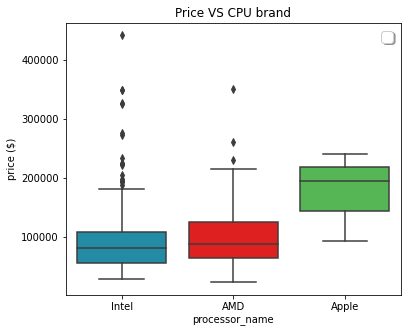

In [ ]:
cpu_palette = {'Intel':'#0d98ba', 'AMD':'#FF0000', 'Apple':'#46C646'}
fig, ax = plt.subplots(figsize=(6,5))
sns.boxplot(x='processor_name', y='price', data=df,palette=cpu_palette)
ax.set_title('Price vs CPU brand ')
plt.ylabel('price ($)')
plt.legend(loc='upper right', ncol=1, fontsize=15, fancybox=True, shadow=True, frameon=True)
plt.title('Price VS CPU brand')
plt.show()

Laptop with Intel CPUs are more expensive




In [ ]:
cpu_list = df['processor_type'].value_counts()[:15].index.tolist()

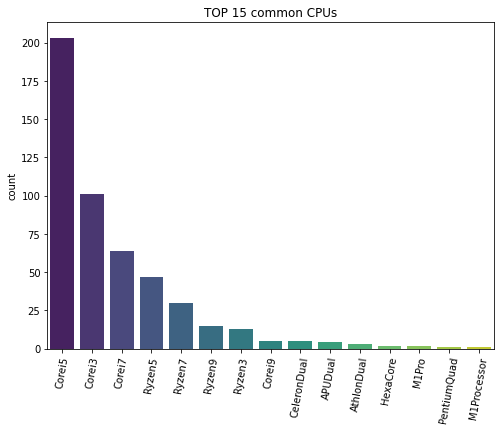

In [ ]:
#Top 15 common CPU
plt.figure(figsize=(8,6))
ax=sns.countplot(x='processor_type', data=df[df['processor_type'].isin(cpu_list)], order = cpu_list, palette='viridis')
plt.xticks(rotation=80);
plt.title('TOP 15 common CPUs')
plt.xlabel('')
plt.show()


The most common CPU is corei5,second is corei3 and third is corei7

In [ ]:
df['company'].value_counts()

ASUS         145
Lenovo       109
HP            90
DELL          76
acer          33
MSI           20
APPLE          7
Nokia          3
Avita          2
Smartron       2
MICROSOFT      2
Mi             1
ALIENWARE      1
RedmiBook      1
Nexstgo        1
Vaio           1
realme         1
Infinix        1
LG             1
Name: company, dtype: int64

In [ ]:
#Considering laptops with atleast 5 laptops in dataset
company_list = df['company'].value_counts().index[:7].tolist()
company_list

['ASUS', 'Lenovo', 'HP', 'DELL', 'acer', 'MSI', 'APPLE']

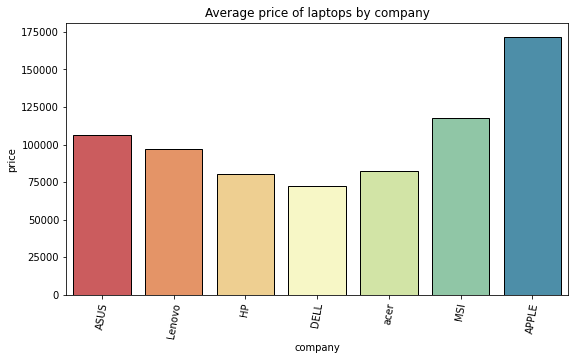

In [ ]:
plt.figure(figsize=(9,5))
ax=sns.barplot(x='company', y='price', data=df[df['company'].isin(company_list)],
                order=company_list, 
                palette='Spectral', 
                ci=False,
                edgecolor="black")
plt.xticks(rotation=80);
plt.title('Average price of laptops by company')
plt.show()

*  APPLE laptops are on average the most expensive,second is MSI and third is ASUS
*  DELL laptops are the cheapest among the dataset

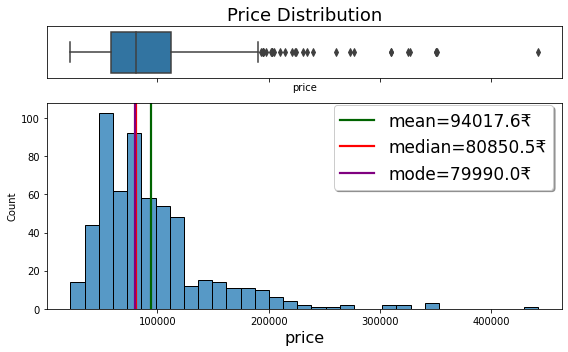

In [ ]:
#Price distributed among laptops
num_plot(df, 'price', 'Price Distribution','₹')

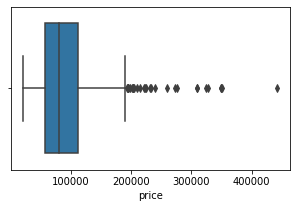

In [ ]:
ax  = plt.subplots(figsize=(5,3))
ax=sns.boxplot(x='price', data=df)

There are some laptops with a price over 250000 rupee

In [ ]:
df[df['price']>250000]

,company,model_name,rating,processor_name,processor_type,generation,ram(GB),size(inch),price,OS,storage_1_sto(GB),storage_1_type
131,ASUS,Zephyrus,4.3,Intel,Corei9,11,32,17.3,441990.0,Windows,3.0,TBSSD
177,ASUS,Core,4.6,Intel,Corei7,10,32,15.6,272990.0,Windows,1.0,TBSSD
294,Lenovo,Legion,4.3,Intel,Corei7,10,16,15.6,349890.0,Windows,1.0,TBSSD
323,ASUS,ROG,4.3,Intel,Corei7,10,32,17.3,309990.0,Windows,1.0,TBSSD
328,ASUS,ROG,4.3,Intel,Corei7,10,32,15.6,324990.0,Windows,1.0,TBSSD
329,ASUS,ROG,4.3,Intel,Corei7,10,32,17.3,309990.0,Windows,1.0,TBSSD
377,ALIENWARE,Core,4.3,Intel,Corei7,9,16,15.6,276120.0,Windows,1.0,TBSSD
380,ASUS,Core,5.0,Intel,Corei9,10,32,15.6,326990.0,Windows,1.0,TBSSD
410,ASUS,ROG,4.3,AMD,Ryzen9,11,32,13.4,350990.0,Windows,1.0,TBSSD
432,ASUS,ROG,4.8,AMD,Ryzen9,11,16,15.6,259990.0,Windows,1.0,TBSSD


Removing outliers

In [ ]:
df= df[df['price']<250000]

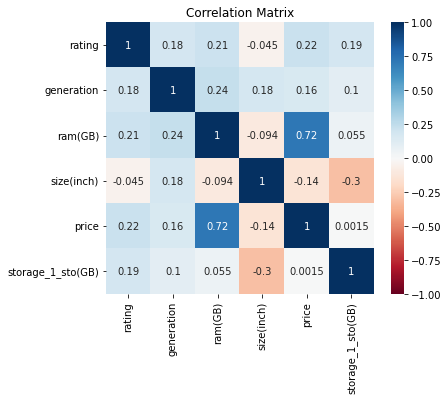

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(), cmap='RdBu', annot=True, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


RAM has a high positive correlation with price (+0.74):Processor generation and rating also have a positive correlation with price,laptops having more specification tends to have a higher price.

**Insights of laptop datas that scrapped from Flipkart**



*  Laptop with Intel CPUs are more expensive
*  Most of the laptops have 8 GB ram
*  Most laptops have 15.6 inches
*  every GB of RAM added on the PC adds roughly 7898₹ to the laptop value.
*  when the generation increases, the PC adds 6138₹ to the laptop
*  Most of the laptops have corei5 processor
*  Most PCs have 512 ssd which is for the most part ssd, for storage of 1 TB most of them are HDD.
*  APPLE laptops are on average the most expensive,second is MSI and third is ASUS
*  DELL laptops are the cheapest among the dataset



In [ ]:
df.head()

,company,model_name,rating,processor_name,processor_type,generation,ram(GB),size(inch),price,OS,storage_1_sto(GB),storage_1_type
0,Lenovo,IdeaPad,4.4,Intel,Corei3,11,8,15.6,63790.0,Windows,512.0,SSD
1,ASUS,TUF,4.4,Intel,Corei5,10,8,15.6,89990.0,Windows,512.0,SSD
2,MSI,GF65,4.4,Intel,Corei7,10,16,15.6,123990.0,Windows,1.0,TBSSD
3,DELL,Vostro,3.9,Intel,Corei3,11,8,14.0,41715.0,Windows,1.0,TBHDD
4,ASUS,Core,4.3,Intel,Corei3,10,4,15.6,48990.0,Windows,512.0,SSD


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 561 entries, 0 to 571
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company            561 non-null    object 
 1   model_name         561 non-null    object 
 2   rating             561 non-null    float64
 3   processor_name     561 non-null    object 
 4   processor_type     561 non-null    object 
 5   generation         561 non-null    int64  
 6   ram(GB)            561 non-null    int64  
 7   size(inch)         561 non-null    float64
 8   price              561 non-null    float64
 9   OS                 561 non-null    object 
 10  storage_1_sto(GB)  561 non-null    float64
 11  storage_1_type     561 non-null    object 
dtypes: float64(4), int64(2), object(6)
memory usage: 57.0+ KB


**Price Prediction**

In [ ]:
lc=LabelEncoder()

In [ ]:
df['company']=lc.fit_transform(df['company'])
df['model_name']=lc.fit_transform(df['model_name'])
df['processor_name']=lc.fit_transform(df['processor_name'])
df['processor_type']=lc.fit_transform(df['processor_type'])
df['OS']=lc.fit_transform(df['OS'])
df['storage_1_type']=lc.fit_transform(df['storage_1_type'])

Label Encoding is done to transform categorical text data to numerical data.

In [ ]:
df.head()

,company,model_name,rating,processor_name,processor_type,generation,ram(GB),size(inch),price,OS,storage_1_sto(GB),storage_1_type
0,7,40,4.4,2,3,11,8,15.6,63790.0,2,512.0,1
1,1,73,4.4,2,4,10,8,15.6,89990.0,2,512.0,1
2,9,35,4.4,2,5,10,16,15.6,123990.0,2,1.0,3
3,3,84,3.9,2,3,11,8,14.0,41715.0,2,1.0,2
4,1,19,4.3,2,3,10,4,15.6,48990.0,2,512.0,1


**Data Preparation**

In [ ]:
x=df.iloc[:,df.columns!='price']
y=df.iloc[:,df.columns=='price']

x is independent variable
y is target variable (since price is being predicted,it is the target variable)

In [ ]:
x.head()

,company,model_name,rating,processor_name,processor_type,generation,ram(GB),size(inch),OS,storage_1_sto(GB),storage_1_type
0,7,40,4.4,2,3,11,8,15.6,2,512.0,1
1,1,73,4.4,2,4,10,8,15.6,2,512.0,1
2,9,35,4.4,2,5,10,16,15.6,2,1.0,3
3,3,84,3.9,2,3,11,8,14.0,2,1.0,2
4,1,19,4.3,2,3,10,4,15.6,2,512.0,1


In [ ]:
y.head()

,price
0,63790.0
1,89990.0
2,123990.0
3,41715.0
4,48990.0


**Train - Test split**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [ ]:
import statsmodels.api as sm
X_sm= x = sm.add_constant(x)
model=sm.OLS(y,X_sm)  
model.fit().summary() 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     97.82
Date:                Thu, 29 Sep 2022   Prob (F-statistic):          1.27e-121
Time:                        15:04:47   Log-Likelihood:                -6455.5
No. Observations:                 561   AIC:                         1.294e+04
Df Residuals:                     549   BIC:                         1.299e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -3.462e+04   2.31e+04     -1.501      0.134   -7.99e+04    1.07e+04
company             237.7459    261.766      0.908      0.364    -276.439     751.931
model_name          183.4712     43.531      4.215      0.000      97.964     268.978
rating             6367.9766   2988.431      2.131      0.034     497.819    1.22e+04
processor_name     1.482e+04   3080.973      4.809      0.000    8765.984    2.09e+04
processor_type     3234.9916    663.821      4.873      0.000    1931.051    4538.932
generation         -905.9676   1076.637     -0.841      0.400   -3020.799    1208.864
ram(GB)            4437.2425    287.052     15.458      0.000    3873.387    5001.098
size(inch)        -3299.3198   1229.416     -2.684      0.008   -5714.254    -884.385
OS                -6854.8985   3186.364     -2.151      0.032   -1.31e+04    -595.941
storage_1_sto(GB)    73.8643      9.667      7.641      0.000      54.876      92.852
storage_1_type       3.5e+04   3286.229     10.652      0.000    2.85e+04    4.15e+04
==============================================================================
Omnibus:                       78.612   Durbin-Watson:                   1.818
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.752
Skew:                           0.917   Prob(JB):                     6.01e-27
Kurtosis:                       4.341   Cond. No.                     8.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**LinearRegression**

In [ ]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
print(regressor.intercept_)
print(regressor.coef_)

[-79027.45824541]
[[  368.77406      202.30750115  8016.5884125  18606.25544503
   4058.6341586   -719.22090781  4254.17660904  -928.28546664
  -7256.12706738    66.05383152 30501.56937009]]


In [ ]:
y_pred=regressor.predict(x_test)

In [ ]:
y_test=y_test.values.reshape(-1,1)

In [ ]:
df=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred.flatten()})
df

,Actual,Predicted
0,107786.0,77338.287866
1,52990.0,66330.100158
2,187990.0,154878.059700
3,59990.0,86269.072538
4,70000.0,92105.142646
...,...,...
164,76990.0,76812.209103
165,156990.0,158774.307407
166,59999.0,91787.319084
167,140990.0,125237.303655


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 18363.554684936393
Mean Squared Error: 575895631.0324835
Root Mean Squared Error: 23997.825548005043


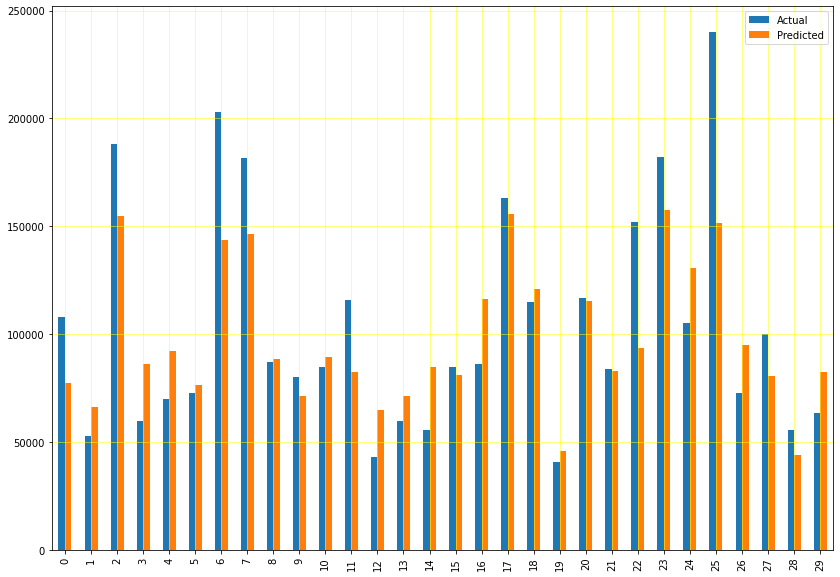

In [ ]:
df1 = df.head(30)
df1.plot(kind='bar',figsize=(14,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='yellow')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7216355043327659

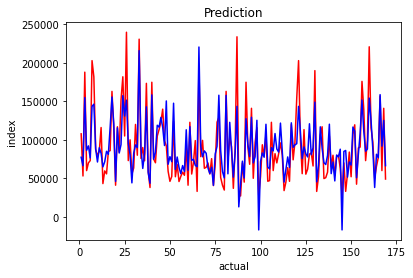

In [ ]:
c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-')
plt.plot(c,y_pred,color='b',linestyle='-')
plt.xlabel('actual')
plt.ylabel('index')
plt.title('Prediction')
plt.show()

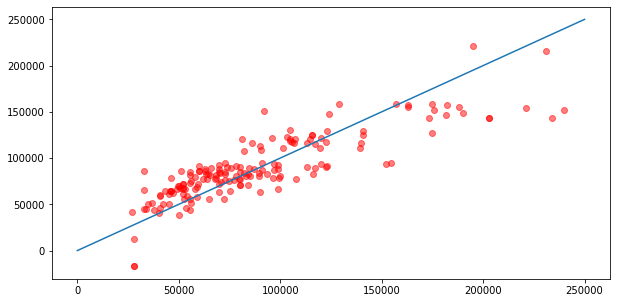

In [ ]:
plt.figure(figsize = (10,5))
plt.scatter(y_test,y_pred, alpha=0.5, color='red')
plt.plot([0,250000], [0,250000])
plt.show()

**Lasso Regression**

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
lm_l = Lasso(alpha=0.13)
lm_l.fit(x_train,y_train)
np.mean(cross_val_score(lm_l,x_train,y_train,scoring='neg_mean_absolute_error',cv=3))

-19467.307685226024

In [ ]:
y_lasso = lm_l.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_lasso,y_test)

18363.57187996111

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_lasso,y_test)

0.5377637441993623

**XGBoost**

In [ ]:
from xgboost import XGBRegressor
regressor = XGBRegressor(random_state = 0)
regressor.fit(x_train,y_train)

[14:58:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
y_xgb = regressor.predict(x_test)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_xgb,y_test)

12802.38467316938

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_xgb,y_test)

0.809276137733965

In [ ]:
from xgboost import XGBRegressor
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

In [ ]:
from sklearn.model_selection import GridSearchCV
xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

In [ ]:
xgb_grid.fit(x_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


GridSearchCV(cv=2, estimator=XGBRegressor(), n_jobs=5,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.03, 0.05, 0.07],
                         'max_depth': [5, 6, 7], 'min_child_weight': [4],
                         'n_estimators': [500], 'nthread': [4],
                         'objective': ['reg:linear'], 'silent': [1],
                         'subsample': [0.7]},
             verbose=True)

In [ ]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

0.7271047838399619
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [ ]:
y_xgb1 = xgb_grid.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_xgb1,y_test)

12193.183362610947

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_xgb1,y_test)

0.8324598346061092